[View in Colaboratory](https://colab.research.google.com/github/datalifelab/corso-open-notebook-science/blob/master/corso_su_colaboratory.ipynb)

# Corso su Colaboratory
## Questo notebook contiene alcune librerie per lavorare in modo integrato nell'ecosistema di google drive:
### Aprire fogli di calcolo di google
### Effettuare la pulizia della matrice dall'importazione


In [1]:
%%html
<marquee style='width: 100%; color: blue;'><b>Buon divertimento!!</b></marquee>

In [2]:
#effettuo l'importazione della libreria per il controllo del sistema operativo
import os
#effettuo l'importazione della libreria statistica Pandas
import pandas as pd
import matplotlib.pyplot as plt
!pip install git+https://github.com/mwaskom/seaborn.git
import seaborn as sns

  Cloning https://github.com/mwaskom/seaborn.git to /tmp/pip-req-build-ffw6y_48
  Running setup.py bdist_wheel for seaborn ... - \ done
  Stored in directory: /tmp/pip-ephem-wheel-cache-_z6a0u1t/wheels/4e/57/af/138c7bf2390a67f7010588cf080fb8b4e741bb290c2ad12018
Successfully built seaborn


In [0]:
!pip install --upgrade -q gspread

In [0]:
#Effettuo le librerie che mi autorizzano ad accedere ai file di google drive
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

#richiedo le credenziali: apre delle istruzioni e link da seguire per completare
#la procedura
gc = gspread.authorize(GoogleCredentials.get_application_default())



In [0]:
def download_gspread(file_name, sheet_name = "Foglio1", key = False, format = "wide"):
  '''questa funzione, dato il nome del file di google spreadsheet
  e dello specifico foglio di calcolo (opzionale) di google
  restituisce un dataframe di pandas
  file_name: str 
  sheet_name: str
  key: boolean
  format: ["wide", "long", None]
  '''
  
  def str_to_float(cell):
    '''trasforma in decimale 
    tutti i valori stringa contententi 
    valori numerici'''
    
    try:
      cell = float(cell)
    except:
      cell = cell
    return cell
  
  #questo comando scarica il foglio 1 del foglio di calcolo
  if key == False:
    if sheet_name == "Foglio1":
      worksheet = gc.open(file_name).sheet1
    else:
      worksheet = gc.open(file_name).worksheet(sheet_name)
  elif key == True:
    if sheet_name == "Foglio1":
      worksheet = gc.open_by_key(file_name).sheet1
    else:
      worksheet = gc.open_by_key(file_name).worksheet(sheet_name)
    
  # prendo tutte le righe del foglio
  rows = worksheet.get_all_values()

  # Converto in DataFrame di Pandas ed effettuo la pulizia dei dati con la funzione
  # str_to_float
  
  dati = pd.DataFrame.from_records(rows)
  if format == "wide":
    dati.columns = dati.loc[0]
    dati = dati.drop(0, axis = 0)  
  else:
    pass
  #converte. dove necessario stringhe verso decimali
  dati = dati.applymap(str_to_float)
  return dati 

In [0]:
dataset = download_gspread("esercitazione")
# https://docs.google.com/spreadsheets/d/1YEnbybH0KhX64kArxHjb74xBd16yCn1VL7Xs3SPG9PA/edit?usp=sharing

In [7]:
dataset

,genere,età,allineamento politico,reddito
1,F,45.0,destra,20000.0
2,M,34.0,centro,25000.0
3,M,23.0,sinistra,18000.0
4,F,18.0,sinistra,17000.0
5,M,77.0,destra,54664.0
6,M,45.0,sinistra,35000.0
7,F,33.0,destra,15000.0
8,F,35.0,destra,12000.0
9,F,36.0,centro,8500.0
10,F,56.0,centro,15000.0


In [8]:
#voglio visualizzare una sola colonna
dataset["reddito"]

1      20000.0
2      25000.0
3      18000.0
4      17000.0
5      54664.0
6      35000.0
7      15000.0
8      12000.0
9       8500.0
10     15000.0
11     13500.0
12     16000.0
13    145000.0
14     23000.0
15      9500.0
16     24000.0
17     60000.0
18     45000.0
Name: reddito, dtype: float64

In [9]:
#oppure due colonne 
dataset.loc[:, ["reddito", "età"]]

,reddito,età
1,20000.0,45.0
2,25000.0,34.0
3,18000.0,23.0
4,17000.0,18.0
5,54664.0,77.0
6,35000.0,45.0
7,15000.0,33.0
8,12000.0,35.0
9,8500.0,36.0
10,15000.0,56.0


In [10]:
print("Questo dato è la media del reddito " + str(dataset["reddito"].mean()))
print("Questo dato è la media dell'età " + str(dataset["età"].mean()))
  

Questo dato è la media del reddito 30898.0
Questo dato è la media dell'età 43.55555555555556


In [11]:
dataset.mean()

0
età           43.555556
reddito    30898.000000
dtype: float64

In [12]:
dataset.describe()

,età,reddito
count,18.000000,18.000000
mean,43.555556,30898.000000
std,18.837454,32191.109134
min,18.000000,8500.000000
25%,33.250000,15000.000000
50%,38.000000,19000.000000
75%,53.250000,32500.000000
max,87.000000,145000.000000


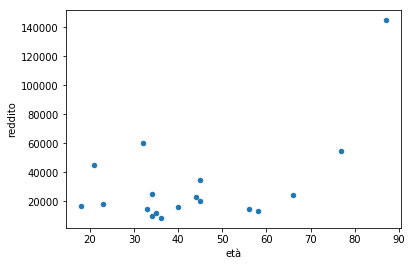

In [13]:
#grafici base
#https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html

dataset.plot(kind = "scatter", y = "reddito", x = "età")

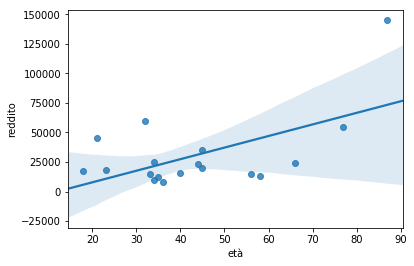

In [14]:
sns.regplot(y="reddito", x="età", data=dataset)
#esempi di grafico https://seaborn.pydata.org/examples/index.html

In [15]:
dataset.loc[:, ["reddito","età"]].corr()

,reddito,età
0,,
reddito,1.000000,0.573598
età,0.573598,1.000000


[tipi di grafico](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html)

In [16]:
# Grafici interattivi
import altair as alt
alt.Chart(dataset).mark_point().encode(
  y="reddito",
  x="età",
  color='allineamento politico'
).interactive()

Chart({
  data: 0  genere   età allineamento politico   reddito
  1       F  45.0                destra   20000.0
  2       M  34.0                centro   25000.0
  3       M  23.0              sinistra   18000.0
  4       F  18.0              sinistra   17000.0
  5       M  77.0                destra   54664.0
  6       M  45.0              sinistra   35000.0
  7       F  33.0                destra   15000.0
  8       F  35.0                destra   12000.0
  9       F  36.0                centro    8500.0
  10      F  56.0                centro   15000.0
  11      F  58.0              sinistra   13500.0
  12      M  40.0              sinistra   16000.0
  13      M  87.0                centro  145000.0
  14      M  44.0              sinistra   23000.0
  15      M  34.0                destra    9500.0
  16      M  66.0                centro   24000.0
  17      M  32.0                destra   60000.0
  18      M  21.0                destra   45000.0,
  encoding: EncodingWithFacet({
    color: Color({
      shorthand: 'allineamento politico'
    }),
    x: X({
      shorthand: 'età'
    }),
    y: Y({
      shorthand: 'reddito'
    })
  }),
  mark: 'point',
  selection: SelectionMapping({
    selector001: SelectionDef({
      bind: 'scales',
      encodings: ['x', 'y'],
      type: 'interval'
    })
  })
})

In [17]:
brush = alt.selection(type='interval')

points = alt.Chart().mark_point().encode(
    x='età:Q',
    y='reddito:Q',
    color=alt.condition(brush, 'allineamento politico:N', alt.value('lightgray'))
).add_selection(
    brush
)

bars = alt.Chart().mark_bar().encode(
    y='allineamento politico:N',
    color='allineamento politico:N',
    x='count(allineamento politico):Q'
).transform_filter(
    brush
)

alt.vconcat(points, bars, data=dataset)

VConcatChart({
  data: 0  genere   età allineamento politico   reddito
  1       F  45.0                destra   20000.0
  2       M  34.0                centro   25000.0
  3       M  23.0              sinistra   18000.0
  4       F  18.0              sinistra   17000.0
  5       M  77.0                destra   54664.0
  6       M  45.0              sinistra   35000.0
  7       F  33.0                destra   15000.0
  8       F  35.0                destra   12000.0
  9       F  36.0                centro    8500.0
  10      F  56.0                centro   15000.0
  11      F  58.0              sinistra   13500.0
  12      M  40.0              sinistra   16000.0
  13      M  87.0                centro  145000.0
  14      M  44.0              sinistra   23000.0
  15      M  34.0                destra    9500.0
  16      M  66.0                centro   24000.0
  17      M  32.0                destra   60000.0
  18      M  21.0                destra   45000.0,
  vconcat: [Chart({
    encoding: EncodingWithFacet({
      color: ColorValue({
        condition: Color({
          selection: 'selector002',
          shorthand: 'allineamento politico:N'
        }),
        value: 'lightgray'
      }),
      x: X({
        shorthand: 'età:Q'
      }),
      y: Y({
        shorthand: 'reddito:Q'
      })
    }),
    mark: 'point',
    selection: SelectionMapping({
      selector002: SelectionDef({
        type: 'interval'
      })
    })
  }), Chart({
    encoding: EncodingWithFacet({
      color: Color({
        shorthand: 'allineamento politico:N'
      }),
      x: X({
        shorthand: 'count(allineamento politico):Q'
      }),
      y: Y({
        shorthand: 'allineamento politico:N'
      })
    }),
    mark: 'bar',
    transform: [FilterTransform({
      filter: {'selection': 'selector002'}
    })]
  })]
})

In [0]:
#scarico i dati di valutazione del questionario
questionario = download_gspread("1PiMvG2mUAQuWAuZeedL0mTyY1xy9fsggHh64v5D99w0", key = True)

In [19]:
questionario.head(2)

,Informazioni cronologiche,1) Codice classe,Conosci queste tecnologie per l'analisi dei dati? [2_1) Foglio di calcolo (es. excel)],Conosci queste tecnologie per l'analisi dei dati? [2_2) Foglio di calcolo - Utilizzo di Tabelle Pivot],Conosci queste tecnologie per l'analisi dei dati? [2_3) Foglio di calcolo - Utilizzo di Macro],Conosci queste tecnologie per l'analisi dei dati? [2_4) Linguaggio e DB SQL],Conosci queste tecnologie per l'analisi dei dati? [2_5) Linguaggio R - Statistica],Conosci queste tecnologie per l'analisi dei dati? [2_6) Linguaggio Python],Conosci queste tecnologie per l'analisi dei dati? [2_7) Software SAS],Conosci queste tecnologie per l'analisi dei dati? [2_8) Software STATA],...,Prima di questa lezione avevi mai sentito parlare di? [4_4) GIS(Geographic information system)],Prima di questa lezione avevi mai sentito parlare di? [4_5) Social Data],Prima di questa lezione avevi mai sentito parlare di? [4_6) Machine Learning],Prima di questa lezione avevi mai sentito parlare di? [4_7) Realtà virtuale],Prima di questa lezione avevi mai sentito parlare di? [4_8) Realtà aumentata],Prima di questa lezione avevi mai sentito parlare di? [4_9) Intelligenza Artificiale],Prima di questa lezione avevi mai sentito parlare di? [4_10) Open Source],Prima di questa lezione avevi mai sentito parlare di? [4_11) Open Science],Prima di questa lezione avevi mai sentito parlare di? [4_12) Open Access],Hai un account google?
1,24/09/2018 17.19.09,Magnier,"3 - Ho provato questa tecnologia, ma non sono...",1 - Non ne ho mai sentito parlare prima di que...,1 - Non ne ho mai sentito parlare prima di que...,1 - Non ne ho mai sentito parlare prima di que...,1 - Non ne ho mai sentito parlare prima di que...,1 - Non ne ho mai sentito parlare prima di que...,1 - Non ne ho mai sentito parlare prima di que...,1 - Non ne ho mai sentito parlare prima di que...,...,1 - No mai,1 - No mai,1 - No mai,"3 - Si, ne ho sentito parlare nei giornali",1 - No mai,"3 - Si, ne ho sentito parlare nei giornali","2 -Qualche volta, ma non ho capito bene di cos...",1 - No mai,"2 -Qualche volta, ma non ho capito bene di cos...",Si
2,24/09/2018 17.19.11,magnier,5 - Ho utilizzato con successo per lavoro o pe...,"2 - Ne ho sentito parlare, ma non l'ho mai ut...","2 - Ne ho sentito parlare, ma non l'ho mai ut...",1 - Non ne ho mai sentito parlare prima di que...,1 - Non ne ho mai sentito parlare prima di que...,1 - Non ne ho mai sentito parlare prima di que...,1 - Non ne ho mai sentito parlare prima di que...,1 - Non ne ho mai sentito parlare prima di que...,...,1 - No mai,1 - No mai,1 - No mai,"3 - Si, ne ho sentito parlare nei giornali","3 - Si, ne ho sentito parlare nei giornali","3 - Si, ne ho sentito parlare nei giornali",1 - No mai,1 - No mai,1 - No mai,Si
